<a href="https://colab.research.google.com/github/facstyle/DataScience_TP/blob/main/_proyectodspartei_cristaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

url ="https://raw.githubusercontent.com/facstyle/DataScience_TP/refs/heads/main/dataset.csv"

df = pd.read_csv(url, sep=';')

df.head()






,company,sector,horizon (days),amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,...,investment,ESG_ranking,PE_ratio,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,BBY,RETAIL,2,100,25/5/2017,26/5/2017,5.555.180.358.886.710,5.348.391.342.163.080,0.383666,0.385748,...,BAD,12.0,12.58,3.73,0.38,3.19,3.01,1.49,8.69,26.69
1,BAC,BANK,330,15000,22/11/2016,18/10/2017,18.616.748.809.814.400,2.465.447.235.107.420,0.322809,0.236350,...,GOOD,26.3,11.39,1.26,1.71,0.54,15.70,0.92,0.67,5.54
2,AXP,BANK,7,3000,27/9/2016,4/10/2016,5.986.229.705.810.540,5.951.772.689.819.330,0.238642,0.235491,...,BAD,19.8,10.58,5.64,1.67,2.60,15.68,1.91,3.39,25.78
3,KSS,RETAIL,5,20000,11/10/2016,17/10/2016,3.821.672.439.575.190,35.985.328.674.316.400,0.428559,0.429340,...,BAD,12.9,11.09,3.27,0.36,1.25,3.17,1.60,4.41,11.35
4,JPM,BANK,360,15000,12/3/2015,7/3/2016,5.186.933.517.456.050,5.204.796.600.341.790,0.194612,0.254011,...,GOOD,27.9,9.38,5.46,1.87,0.81,19.91,0.99,0.81,8.91


**Identificacion de valores perdidos**



In [5]:

df.isna()


df.isna().sum()


,0
company,0
sector,0
horizon (days),0
amount,0
date_BUY_fix,0
date_SELL_fix,0
price_BUY,0
price_SELL,0
Volatility_Buy,0
Volatility_sell,0


**Tipo de dato de cada campo**

In [6]:
print(df.dtypes)


company                      object
sector                       object
horizon (days)                int64
amount                        int64
date_BUY_fix                 object
date_SELL_fix                object
price_BUY                    object
price_SELL                   object
Volatility_Buy              float64
Volatility_sell             float64
Sharpe Ratio                float64
expected_return (yearly)     object
inflation                   float64
nominal_return               object
investment                   object
ESG_ranking                 float64
PE_ratio                    float64
EPS_ratio                   float64
PS_ratio                    float64
PB_ratio                    float64
NetProfitMargin_ratio       float64
current_ratio               float64
roa_ratio                   float64
roe_ratio                   float64
dtype: object


** Copnvierto los campos (date_BUY_fix, date_SELL_fix) que están como texto a datetime.**





In [7]:
cols = ['date_BUY_fix', 'date_SELL_fix']
df[cols] = df[cols].apply(pd.to_datetime, errors='coerce')
df.dtypes


/tmp/ipython-input-1480575157.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[cols] = df[cols].apply(pd.to_datetime, errors='coerce')
/tmp/ipython-input-1480575157.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[cols] = df[cols].apply(pd.to_datetime, errors='coerce')


,0
company,object
sector,object
horizon (days),int64
amount,int64
date_BUY_fix,datetime64[ns]
date_SELL_fix,datetime64[ns]
price_BUY,object
price_SELL,object
Volatility_Buy,float64
Volatility_sell,float64


**Copnvierto los campos (price_BUY, price_SELL,expected_return (yearly),nominal_return) que están como texto a float.**

In [8]:
cols_to_float = ['price_BUY', 'price_SELL', 'expected_return (yearly)', 'nominal_return']

df[cols_to_float] = df[cols_to_float].apply(pd.to_numeric, errors='coerce')

print(df.dtypes)

company                             object
sector                              object
horizon (days)                       int64
amount                               int64
date_BUY_fix                datetime64[ns]
date_SELL_fix               datetime64[ns]
price_BUY                          float64
price_SELL                         float64
Volatility_Buy                     float64
Volatility_sell                    float64
Sharpe Ratio                       float64
expected_return (yearly)           float64
inflation                          float64
nominal_return                     float64
investment                          object
ESG_ranking                        float64
PE_ratio                           float64
EPS_ratio                          float64
PS_ratio                           float64
PB_ratio                           float64
NetProfitMargin_ratio              float64
current_ratio                      float64
roa_ratio                          float64
roe_ratio  

**Analisis de la correlacion entre cada sector**

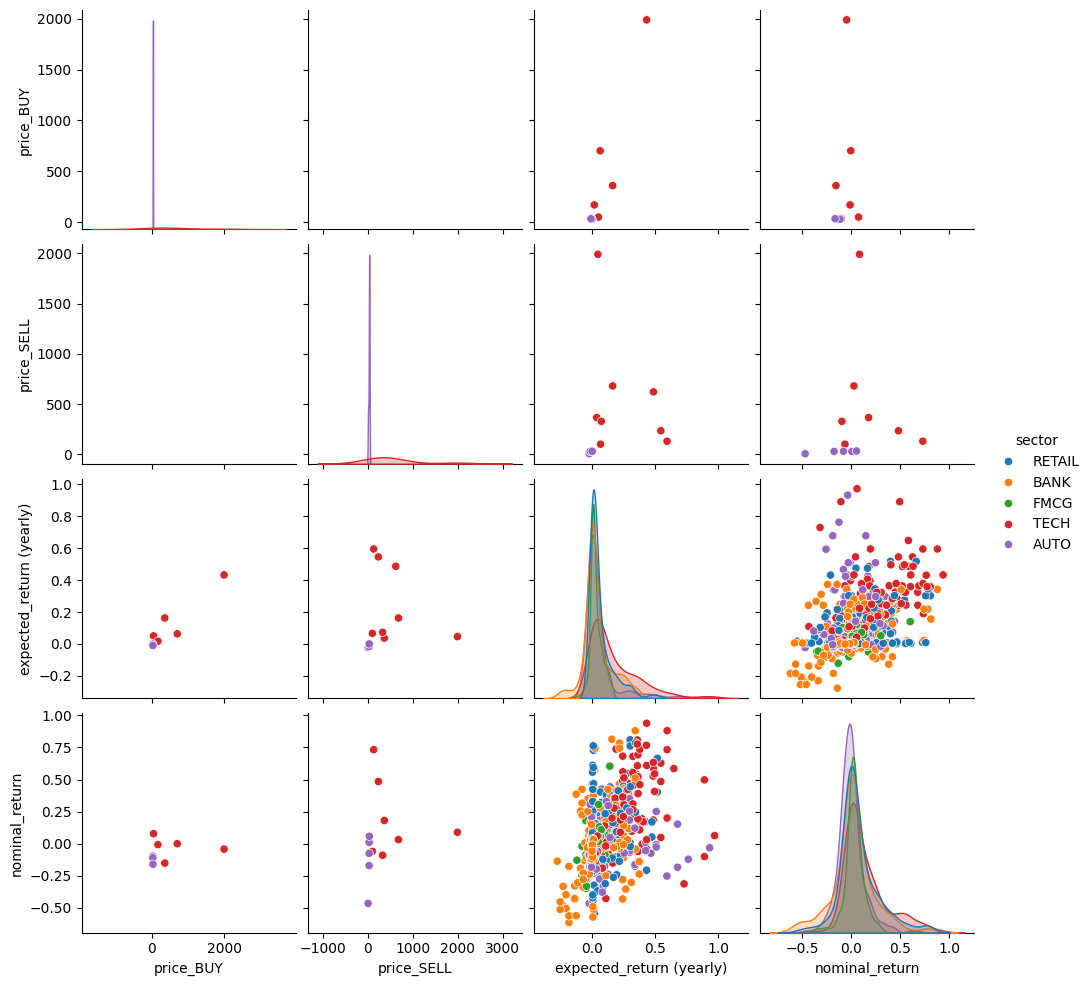

In [9]:
sns.pairplot(df, hue='sector', vars=['price_BUY', 'price_SELL', 'expected_return (yearly)', 'nominal_return'])
plt.show()


** Resumen numerico por sector**

In [10]:

summary = df.groupby('sector')['expected_return (yearly)'].agg(
    promedio='mean',
    mediana='median',
    minimo='min',
    maximo='max',
    count='count'
).reset_index()

print(summary)


   sector  promedio   mediana    minimo    maximo  count
0    AUTO  0.055245  0.001756 -0.023626  0.932565    266
1    BANK  0.038866  0.003148 -0.278002  0.373023    307
2    FMCG  0.028680  0.010582 -0.121809  0.152388    169
3  RETAIL  0.062243  0.013292  0.000113  0.517411    287
4    TECH  0.167151  0.094570  0.000524  0.972724    276


/tmp/ipython-input-3616752096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='sector', y='mediana', palette='viridis')


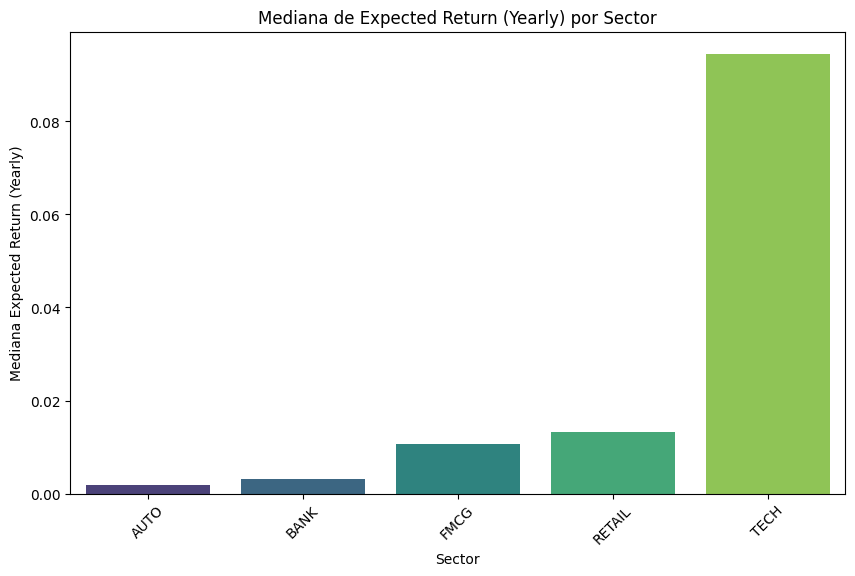

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=summary, x='sector', y='mediana', palette='viridis')
plt.xticks(rotation=45)
plt.title("Mediana de Expected Return (Yearly) por Sector")
plt.ylabel("Mediana Expected Return (Yearly)")
plt.xlabel("Sector")
plt.show()


**Boxplot por sector**

/tmp/ipython-input-3206191850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sector', y='expected_return (yearly)', palette='Set2')


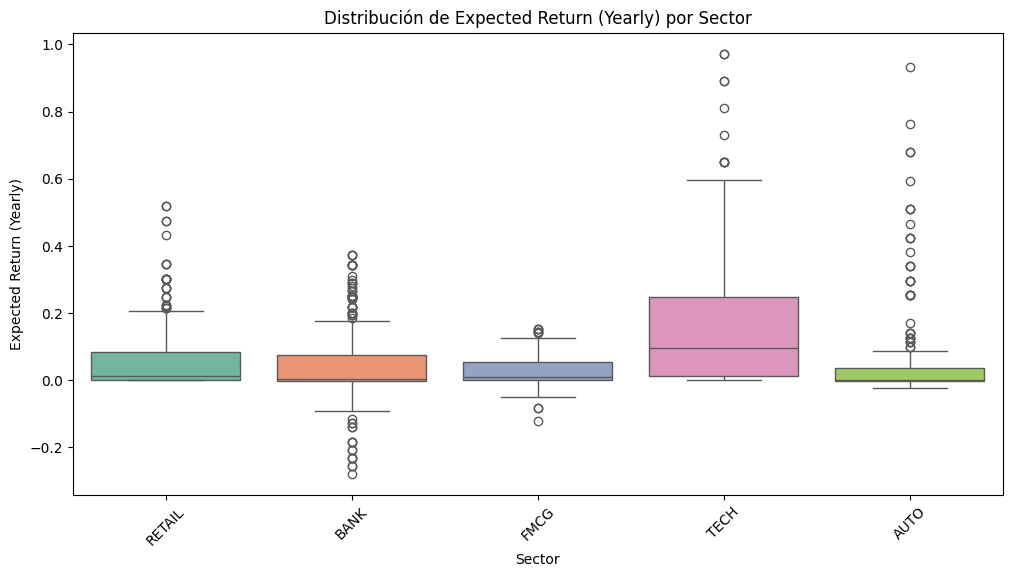

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='sector', y='expected_return (yearly)', palette='Set2')
plt.xticks(rotation=45)
plt.title("Distribución de Expected Return (Yearly) por Sector")
plt.ylabel("Expected Return (Yearly)")
plt.xlabel("Sector")
plt.show()
